# Image Compression Techniques   

## Table of Contents     

### Section 1 (Algorithms - Pseudo code/Output)

** Sigular Value Decomposition (SVD) **  
   - 1.1 Algorithm 1  - SVD using Power Method   
   - 1.2 Algorithm 2  - SVD using QR Eigen (Householder Reflection)   

** QR Decomposition **  
   - 1.3 Algorithm 3 - QR decomposition    

** LU Decomposition **  
   - 1.4 Algorithm 4 - LU decomposition   

### Section 2  (Using Standard Library/Output)

** Numpy/Scipy Linear Algebra Library Based Image Compression **  
   - 2.1 SVD using Numpy   
   
   - 2.2 QR using Numpy    
   
   - 2.3 LU using Scipy    
  
### Section 3 (Unit test summary)


In [1]:
# Import image library
import numpy as np
from PIL import Image

### Input image for compression

In [2]:
# open image file and store as numpy matrix
img = Image.open('baboon-grayscale.png')
#img = Image.open('image2.png')
#img = Image.open('image3.png')
imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

** Run pylab inline **

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Files and Functions

In [4]:
# import user defined compression methods
import common as cmn

### Original Image

(298, 298)


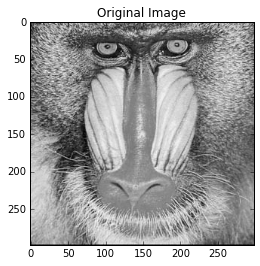

In [5]:
cmn.orig_img_plot(imgmat)

In [6]:
# import user defined compression methods
import compression as comp

### Sigular Value Decomposition (SVD)

$$ $$
<img src="./svd2.png" width=350>

$$ $$
<img src="./svd1.png" width=350>

### 1.1 Algorithm 1 - SVD using Power Method

$$ $$
<img src="./power-method.png" width=350>

Problem with power method:
    the convergence rate of even the one-dimensional problem depends on the ratio of the first and second singular values, $\sigma_1 / \sigma_2$. If that ratio is very close to 1, then the convergence will take a long time and need many many matrix-vector multiplications.

(Original == Reconstructed) :  True


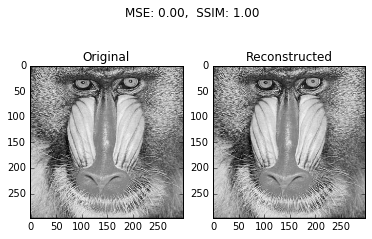

---------------------------------
Plot reconstructed image by rank:
---------------------------------
		   rank =  5


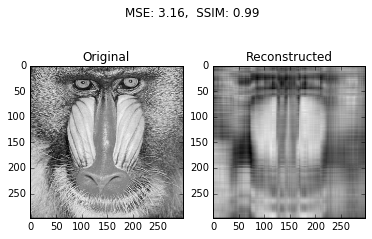

		   rank =  15


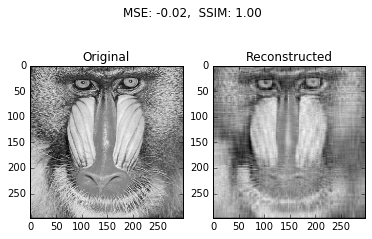

		   rank =  25


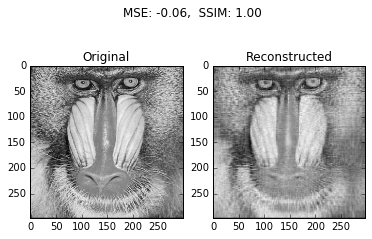

		   rank =  35


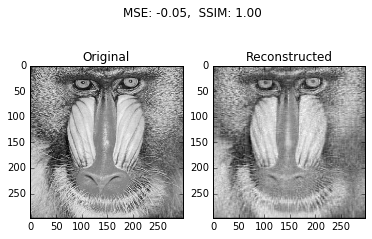

		   rank =  45


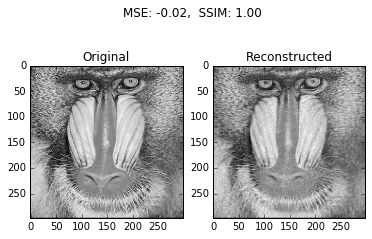

-------------------------------
 MSE/SSIM vs Singular Values:
-------------------------------


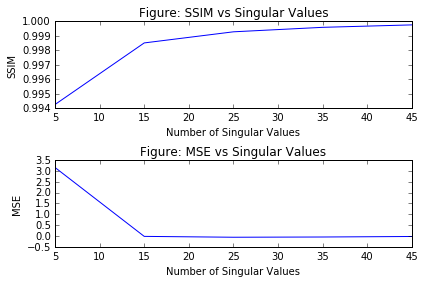

In [7]:
# Compute SVD using power method
comp.svd_power(imgmat)

### 1.2 Algorithm 2 - SVD using QR Eigen (Householder Reflection)

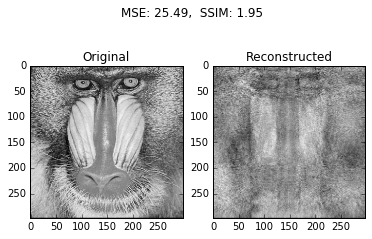

In [8]:
# Compute SVD using QR-Eigen method
comp.svd_qr(imgmat)

*** SVD-QR method has decomposition issue. This needs more time to debug as it involves eigenvalues and eigenvector derivation using QR-Householder reflection method. Faced sign amiguity issues and code below algorithm, but could not resove it completely ***

Reference:
[Sign Ambiguity](http://prod.sandia.gov/techlib/access-control.cgi/2007/076422.pdf)

### QR Decomposition

### 1.3 Algorithm 3 - QR decomposition

(Original == Reconstructed) :  True


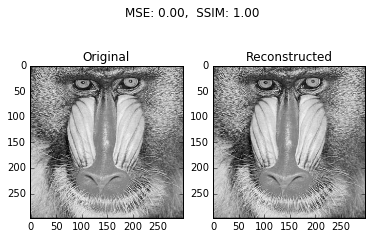

In [9]:
# Compute QR decomposition and image reconstruction
comp.qr_householder(imgmat)

### LU Decomposition

### 1.4 Algorithm 4 - LU decomposition

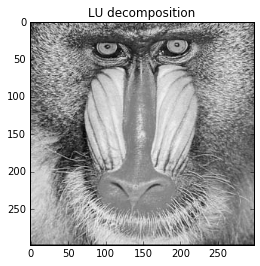

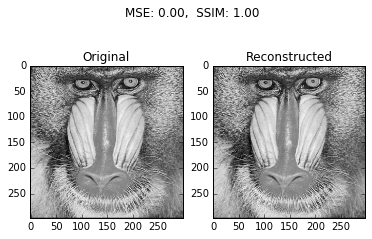

In [10]:
# Compute LU decomposition and image reconstruction
comp.lu(imgmat)

### Standard (numpy linear algebra) Library Image Compression Techniques

In [11]:
# import standard numpy compressino methods
import numpy_compression as np_comp

#### Singular Value Decomposion (SVD)

(Original == Reconstructed) :  True
---------------------------------
Plot reconstructed image by rank:
---------------------------------
		   rank =  5


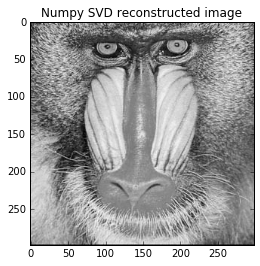

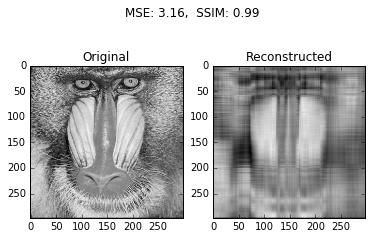

		   rank =  15


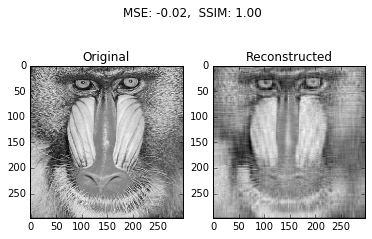

		   rank =  25


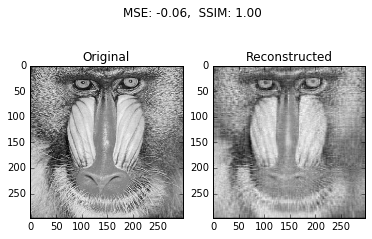

		   rank =  35


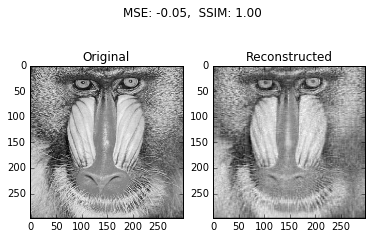

		   rank =  45


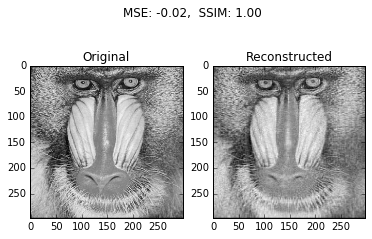

-------------------------------
 MSE/SSIM vs Singular Values:
-------------------------------


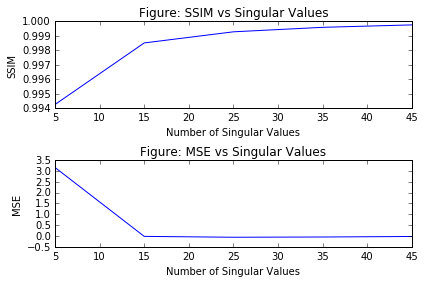

In [12]:
# Compute SVD using Numpu Linear Algebra Library
np_comp.numpy_svd(imgmat)

#### QR Decomposition

(Original == Reconstructed) :  True


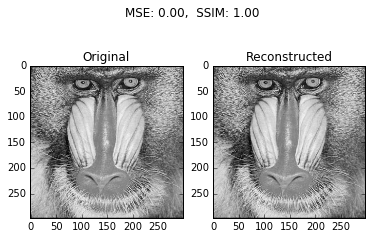

In [13]:
# Compute QR decomposition using Numpu Linear Algebra Library
np_comp.numpy_qr(imgmat)

#### LU Decmoposition

(Original == Reconstructed) :  True


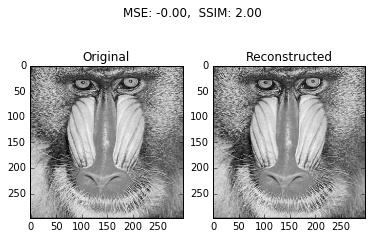

In [14]:
# Compute LU decomposition using Numpu Linear Algebra Library
np_comp.scipy_lu(imgmat)

### Section 3 (Unit Test Summary)

-) Tested with different input image sizes or as appropriate:  
(Supported for m x n input image)  
svd_power()     :  Function computes SVD using power method    
svd_qr()        :  Function computes SVD using QR determined eigenvalues and eigenvector   

(Supported for m x m square input image)  
qr_householder():  Function computes QR decomposition using householder reflection and image reconstruction    
lu()            :  Function computes LU decomposition and image reconstruction   

-) Compared input image with reconstructed image.  
Functionality is inbuilt in each function  
